## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [41]:
from sklearn import datasets, linear_model
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
data = datasets.load_wine()

In [4]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
X = data.data[:]
y = data.target
df = pd.DataFrame(X, columns=data.feature_names, index=None)

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


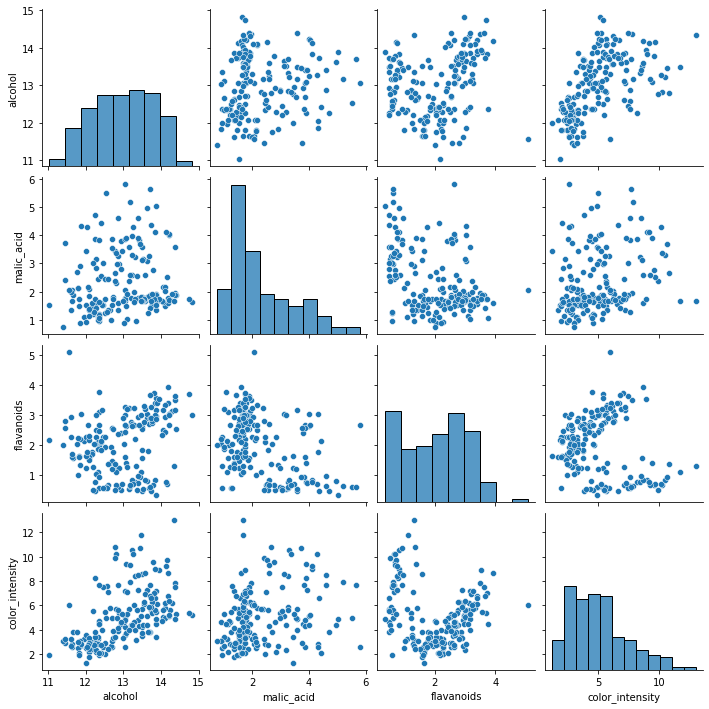

In [7]:
sns.pairplot(data=df[['alcohol', 'malic_acid', 'flavanoids', 'color_intensity']]);

In [20]:
# 我們拿顏色密度和酒精濃度做比較
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [33]:
x_train, x_test, y_train, y_test = train_test_split(df[['alcohol']], df[['color_intensity']], test_size=0.1, shuffle=True)


In [35]:
regresor = linear_model.LinearRegression()
regresor.fit(x_train, y_train)

y_pred = regresor.predict(x_test)

In [39]:
print('Coefficients: ', regresor.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [[1.57290132]]
Mean squared error: 6.74


In [38]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.03337529319155663

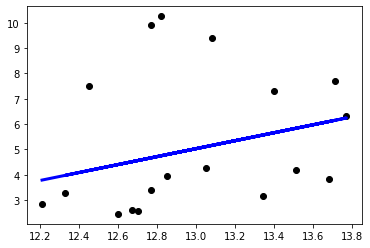

In [42]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()